In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, r2_score

First we need to load the data. The data we will be using is currently in the dataset folder. This is a dataset that was downloaded from Kaggle.

In [23]:
data = pd.read_csv('../dataset/AmesHousing.csv')

# print the first lines of the dataset
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Now that our training and testing sets are ready, we can firstly visualize the initial data, so that we can get a better feel of the data we are working with.

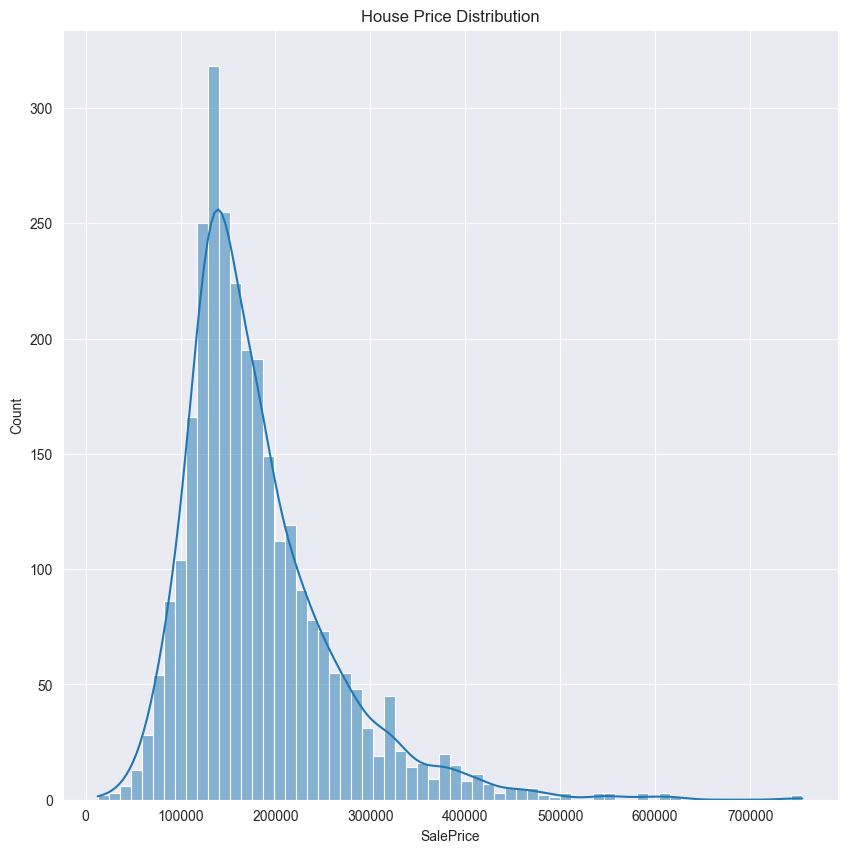

In [24]:
plt.figure(figsize = (10,10))
sns.histplot(data['SalePrice'], kde=True)
plt.title('House Price Distribution')
plt.show()

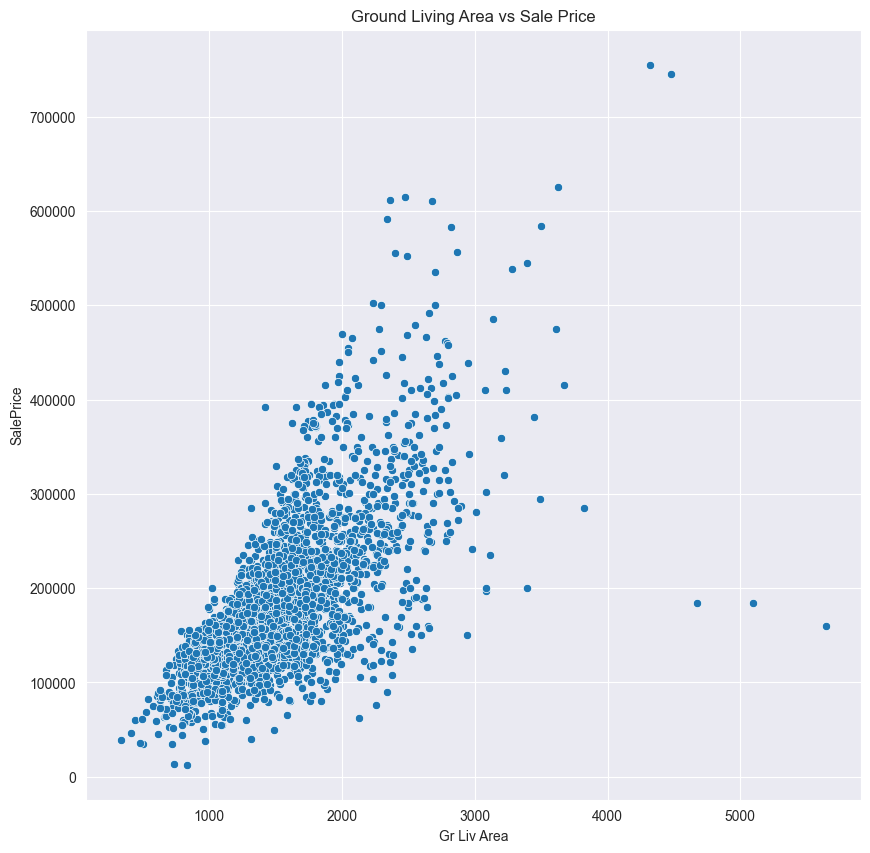

In [25]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=data['Gr Liv Area'], y=data['SalePrice'], data=data)
plt.title('Ground Living Area vs Sale Price')
plt.show()

Now, it is time to clean the data that we will be using. We will fill the empty sale price data with the mean value of the sale price.

In [26]:
num_cols = data.select_dtypes(include="number").columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

data = pd.get_dummies(data)

We can now separate the data in a training and testing set.

In [27]:
y = data['SalePrice']
X = data.drop('SalePrice', axis=1)

X_training, X_testing, y_training, y_testing = sklearn.model_selection.train_test_split(X, y)

We can also view the values in each set, to make sure everything is right:

In [28]:
print(X_training.head())
print(X_testing.head())

print(y_training.head())
print(y_testing.head())

      Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
1122   1123  528462040           20          95.0     11639             7   
509     510  528435030           20          78.0      9262             8   
1924   1925  535177110           20          80.0      9736             6   
1851   1852  533242090           60          68.0      8010             8   
448     449  528166090           20         110.0     15274             9   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
1122             5        2007            2008           0.0  ...   
509              5        2008            2009         194.0  ...   
1924             6        1957            1969         289.0  ...   
1851             5        2003            2004           0.0  ...   
448              5        2003            2003         724.0  ...   

      Sale Type_New  Sale Type_Oth  Sale Type_VWD  Sale Type_WD   \
1122           True          False          False     

So, the first model we are going to try  is Linear Regression. Linear regression is the simplest model we are going to use and the results will probably be worse than the ones from the more complex models.

In [29]:
model = sklearn.linear_model.LinearRegression()

Next we are going to train the model, using the training set that we extracted from the initial dataset.

In [30]:
model.fit(X_training, y_training)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Lastly we are going to make predictions using the model we trained

In [31]:
y_pred = model.predict(X_testing)

To evaluate the estimation and performance of the model, we are going to calculate the mean absolute error and the r-squared.

In [32]:
mae = mean_absolute_error(y_testing, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_testing, y_pred)
print(f"R2 Score: {r2}")

Mean Absolute Error: 16550.79314679505
R2 Score: 0.870145397219272


The next algorithm we are going to use to train our next model will be the random forest regression

In [34]:
rf_model = sklearn.ensemble.RandomForestRegressor()
rf_model.fit(X_training, y_training)

rf_y_pred = rf_model.predict(X_testing)

rf_mae = mean_absolute_error(y_testing, rf_y_pred)
print(f"Mean Absolute Error: {rf_mae}")

rf_r2 = r2_score(y_testing, rf_y_pred)
print(f"R2 Score: {rf_r2}")

Mean Absolute Error: 16342.14435197817
R2 Score: 0.8994057064528603


The last algorithm we are going to try is the Gradient Boosting algorithm

In [36]:
gb_model = sklearn.ensemble.GradientBoostingRegressor()
gb_model.fit(X_training, y_training)

gb_y_pred = gb_model.predict(X_testing)

gb_mae = mean_absolute_error(y_testing, gb_y_pred)
print(f"Mean Absolute Error: {gb_mae}")

gb_r2 = r2_score(y_testing, gb_y_pred)
print(f"R2 Score: {gb_r2}")

Mean Absolute Error: 14630.956137190326
R2 Score: 0.9298223849225162


What we can see is that the Linear Regression has the lowest r2_score and the highest mean absolute error, which means that it has the worst performance compared to all the algorithms we tried so far. The Random Forest algorithms has better results than the Linear Regression algorithm, but still worse results than the Gradient Boosting algorithm.